https://www.youtube.com/watch?v=eMOA1pPVUc4

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

#### Merging 12 months data

In [72]:
df = pd.read_csv('./Sales_Data/Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [73]:
df.shape

(18383, 6)

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18383 entries, 0 to 18382
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          18324 non-null  object
 1   Product           18324 non-null  object
 2   Quantity Ordered  18324 non-null  object
 3   Price Each        18324 non-null  object
 4   Order Date        18324 non-null  object
 5   Purchase Address  18324 non-null  object
dtypes: object(6)
memory usage: 861.8+ KB


In [75]:
df.isnull().sum()

Order ID            59
Product             59
Quantity Ordered    59
Price Each          59
Order Date          59
Purchase Address    59
dtype: int64

### importing sales data for all the months

In [76]:
files = [file for file in os.listdir('./Sales_Data')]

In [77]:
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


##### concatenating all the files

In [78]:
files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data, df])
    
    
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [79]:
all_months_data.shape

(186850, 6)

In [80]:
all_months_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [81]:
all_months_data.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

##### Drop rows for NaN

In [82]:
all_months_data.isna().any(axis=1).sum()
# total 545 rows with Nan Values

545

In [83]:
# finding rows with Nan values
all_months_data[all_months_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
10012,NaN,NaN,NaN,NaN,NaN,NaN
10274,NaN,NaN,NaN,NaN,NaN,NaN
10878,NaN,NaN,NaN,NaN,NaN,NaN
11384,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
# find nan
nan_df = all_months_data[all_months_data.isna().any(axis=1)]
nan_df.shape

(545, 6)

In [85]:
all_data = all_months_data.dropna(how='all')

In [86]:
all_data = all_data.reset_index(drop=True)

In [87]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [88]:
all_data.shape

(186305, 6)

In [89]:
all_data[all_data.isna().any(axis=1)].sum()

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64

In [90]:
186850 - 186305

545

##### 545 columns dropped

In [91]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

##### data has strings in numeric columns

In [92]:
all_data.iloc[516:518,:]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
516,177054,Apple Airpods Headphones,1,150,04/09/19 19:18,"800 Jackson St, Atlanta, GA 30301"
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [93]:
all_data[~all_data['Quantity Ordered'].str.isnumeric()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
517,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1146,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1152,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2869,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2884,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184624,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185009,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186019,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


##### dropping columns with strings in numeric columns

In [94]:
all_data[all_data['Quantity Ordered'].str.isnumeric()].shape

(185950, 6)

In [95]:
all_data= all_data[all_data['Quantity Ordered'].str.isnumeric()]
# finding the rows where thre is numeric data in Qunatity Orderd

In [96]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [97]:
all_data.shape

(185950, 6)

In [98]:
186305-185950

355

##### 355 columns dropped

#### converting to numeric data

In [99]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [100]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [101]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### What was the best month for sales? How much was earned that month?

In [102]:
all_data['Sales'] = all_data['Price Each'] * all_data['Quantity Ordered']

In [103]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99


##### converting Order date column into datetime

In [104]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [105]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99


##### extracting month and year

In [106]:
all_data.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Sales                      float64
dtype: object

In [107]:
all_data['order_year'] = all_data['Order Date'].dt.year
all_data['order_month'] = all_data['Order Date'].dt.month
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,order_year,order_month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4
...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,2019,9
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,2019,9


In [108]:
all_data.groupby('order_month').sum()

,Quantity Ordered,Price Each,Sales,order_year
order_month,,,,
1,10903,1811768.38,1822256.73,19602505
2,13449,2188884.72,2202022.42,24177525
3,17005,2791207.83,2807100.38,30593907
4,20558,3367671.02,3390670.24,36905301
5,18667,3135125.13,3152606.75,33446754
6,15253,2562025.61,2577802.26,27365526
7,16072,2632539.56,2647775.76,28857567
8,13448,2230345.42,2244467.88,24149259
9,13109,2084992.09,2097560.13,23462799


In [109]:
all_data.groupby('order_month').sum('Sales').sort_values(by='Sales',ascending=False)

,Quantity Ordered,Price Each,Sales,order_year
order_month,,,,
12,28114,4588415.41,4613443.34,50442696
10,22703,3715554.83,3736726.88,40949358
4,20558,3367671.02,3390670.24,36905301
11,19798,3180600.68,3199603.20,35479887
5,18667,3135125.13,3152606.75,33446754
3,17005,2791207.83,2807100.38,30593907
7,16072,2632539.56,2647775.76,28857567
6,15253,2562025.61,2577802.26,27365526
8,13448,2230345.42,2244467.88,24149259


In [110]:
results = all_data.groupby('order_month').sum()
results.tail()

,Quantity Ordered,Price Each,Sales,order_year
order_month,,,,
8,13448,2230345.42,2244467.88,24149259
9,13109,2084992.09,2097560.13,23462799
10,22703,3715554.83,3736726.88,40949358
11,19798,3180600.68,3199603.20,35479887
12,28114,4588415.41,4613443.34,50442696


In [111]:
results.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='order_month')

In [112]:
results['Sales']

order_month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Sales, dtype: float64

##### Ans - DECEMBER  had more sales

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='order_month')


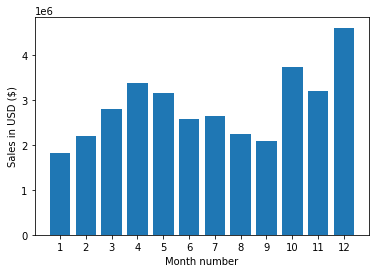

In [113]:
months = results.index # list of months
print(months)

plt.bar(months,all_data.groupby(['order_month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### Extracting City and state

In [114]:
all_data['Purchase Address'].iloc[0].split(",")
# retruns a list

['917 1st St', ' Dallas', ' TX 75001']

In [115]:
all_data['Purchase Address'].iloc[0].split(",")[1].strip()

'Dallas'

In [116]:
def city_name(address):
    return address.split(",")[1].strip()
    

In [117]:
all_data['City']= all_data['Purchase Address'].apply(city_name)

In [118]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,order_year,order_month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,Dallas
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,Boston
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles
...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9,Los Angeles
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9,San Francisco
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,2019,9,San Francisco
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,2019,9,San Francisco


In [119]:
all_data['Purchase Address'].iloc[0].split(",")[2].split(" ")[1]

'TX'

In [120]:
def state_name(address):
    return address.split(",")[2].split(" ")[1].strip()

In [121]:
all_data['State']= all_data['Purchase Address'].apply(state_name)

In [122]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,order_year,order_month,City,State
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,Dallas,TX
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,Boston,MA
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles,CA
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...
186300,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9,Los Angeles,CA
186301,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9,San Francisco,CA
186302,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,2019,9,San Francisco,CA
186303,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,2019,9,San Francisco,CA


In [123]:
all_data['city_and_state'] = all_data['Purchase Address'].apply(lambda x: f"{city_name(x)}  ({state_name(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,order_year,order_month,City,State,city_and_state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,Dallas,TX,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,Boston,MA,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles,CA,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA,Los Angeles (CA)


#### Which city had highest Sale?

In [124]:
all_data.groupby('City').sum()

,Quantity Ordered,Price Each,Sales,order_year,order_month
City,,,,,
Atlanta,16602,2779908.20,2795498.58,30044739,104794
Austin,11153,1809873.61,1819581.75,19998197,69829
Boston,22528,3637409.77,3661642.01,40246750,141112
Dallas,16730,2752627.82,2767975.40,29921582,104620
Los Angeles,33289,5421435.23,5452570.80,59772496,208325
New York City,27932,4635370.83,4664317.43,50224654,175741
Portland,14053,2307747.47,2320490.61,25166837,87765
San Francisco,50239,8211461.74,8262203.91,90313920,315520
Seattle,16553,2733296.01,2747755.48,29743909,104941


In [125]:
all_data.groupby('City').sum()['Sales'].sort_values(ascending=False)

City
San Francisco    8262203.91
Los Angeles      5452570.80
New York City    4664317.43
Boston           3661642.01
Atlanta          2795498.58
Dallas           2767975.40
Seattle          2747755.48
Portland         2320490.61
Austin           1819581.75
Name: Sales, dtype: float64

In [126]:
cities = all_data.groupby('city_and_state').sum()['Sales']
cities

city_and_state
Atlanta  (GA)          2795498.58
Austin  (TX)           1819581.75
Boston  (MA)           3661642.01
Dallas  (TX)           2767975.40
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Portland  (ME)          449758.27
Portland  (OR)         1870732.34
San Francisco  (CA)    8262203.91
Seattle  (WA)          2747755.48
Name: Sales, dtype: float64

In [127]:
all_data.groupby('city_and_state').sum()['Sales'].sort_values(ascending=False)

city_and_state
San Francisco  (CA)    8262203.91
Los Angeles  (CA)      5452570.80
New York City  (NY)    4664317.43
Boston  (MA)           3661642.01
Atlanta  (GA)          2795498.58
Dallas  (TX)           2767975.40
Seattle  (WA)          2747755.48
Portland  (OR)         1870732.34
Austin  (TX)           1819581.75
Portland  (ME)          449758.27
Name: Sales, dtype: float64

##### San francisco had highest sales with 8262203.91 sales

Index(['Atlanta  (GA)', 'Austin  (TX)', 'Boston  (MA)', 'Dallas  (TX)',
       'Los Angeles  (CA)', 'New York City  (NY)', 'Portland  (ME)',
       'Portland  (OR)', 'San Francisco  (CA)', 'Seattle  (WA)'],
      dtype='object', name='city_and_state')


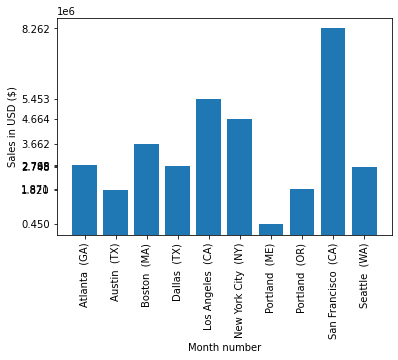

In [128]:
citiess = cities.index # list of months
print(citiess)

plt.bar(citiess,all_data.groupby(['city_and_state']).sum()['Sales'])
plt.xticks(cities.index, rotation='vertical')
plt.yticks(all_data.groupby(['city_and_state']).sum()['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

### What time should we display the ads to maximize likelihood of customer's buying product?

In [129]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,order_year,order_month,City,State,city_and_state
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,Dallas,TX,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,Boston,MA,Boston (MA)
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles,CA,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA,Los Angeles (CA)


In [130]:
all_data['time'] = all_data['Order Date'].dt.time

In [131]:
all_data['hour'] = all_data['Order Date'].dt.hour

In [132]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,order_year,order_month,City,State,city_and_state,time,hour
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,Dallas,TX,Dallas (TX),08:46:00,8
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,Boston,MA,Boston (MA),22:30:00,22
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles,CA,Los Angeles (CA),14:38:00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA,Los Angeles (CA),14:38:00,14
4,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA,Los Angeles (CA),09:27:00,9


In [133]:
all_data.groupby('hour').sum()

,Quantity Ordered,Price Each,Sales,order_year,order_month
hour,,,,,
0,4428,709296.70,713721.27,7894302,27554
1,2619,458490.00,460866.88,4744659,16657
2,1398,233833.64,234851.44,2509621,8507
3,928,144726.42,145757.89,1677792,5904
4,937,162058.18,162661.01,1724230,6148
5,1493,229621.21,230679.82,2667101,9301
6,2810,445000.11,448113.00,5011158,17539
7,4556,740568.11,744854.12,8098209,28850
8,7002,1185970.62,1192348.97,12630864,43626


In [134]:
all_data.groupby('hour').sum()['Quantity Ordered']

hour
0      4428
1      2619
2      1398
3       928
4       937
5      1493
6      2810
7      4556
8      7002
9      9816
10    12308
11    14005
12    14202
13    13685
14    12362
15    11391
16    11662
17    12229
18    13802
19    14470
20    13768
21    12244
22     9899
23     7065
Name: Quantity Ordered, dtype: int64

In [135]:
all_data.groupby(['hour']).count()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,order_year,order_month,City,State,city_and_state,time
hour,,,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [141]:
[x for x, df in all_data.groupby(['hour'])]

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [142]:
set(all_data['hour'])

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23}

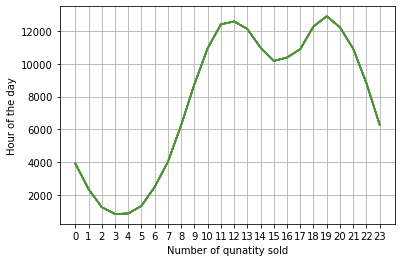

In [145]:
# hour key for the graph

keys = [x for x, df in all_data.groupby(['hour'])]
#keys = list(set(all_data['hour']))

plt.plot(keys, all_data.groupby(['hour']).count()) # count number of rows for each hour

plt.xticks(keys)
plt.grid()
plt.ylabel('Hour of the day')
plt.xlabel('Number of qunatity sold')
plt.show()
plt.show()


### What products are often sold together?

In [153]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]
df.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,order_year,order_month,City,State,city_and_state,time,hour
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles,CA,Los Angeles (CA),14:38:00,14
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA,Los Angeles (CA),14:38:00,14
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles,CA,Los Angeles (CA),19:42:00,19
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,2019,4,Los Angeles,CA,Los Angeles (CA),19:42:00,19
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,2019,4,Boston,MA,Boston (MA),11:31:00,11
30,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,2019,4,Boston,MA,Boston (MA),11:31:00,11


In [156]:
# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

# transform is similar to apply function
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df.head()

C:\Users\MOHIT~1.KUM\AppData\Local\Temp/ipykernel_11976/1920591348.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,order_year,order_month,City,State,city_and_state,time,hour,Grouped
2,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles,CA,Los Angeles (CA),14:38:00,14,"Google Phone,Wired Headphones"
3,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,Los Angeles,CA,Los Angeles (CA),14:38:00,14,"Google Phone,Wired Headphones"
17,176574,Google Phone,1,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",600.00,2019,4,Los Angeles,CA,Los Angeles (CA),19:42:00,19,"Google Phone,USB-C Charging Cable"
18,176574,USB-C Charging Cable,1,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",11.95,2019,4,Los Angeles,CA,Los Angeles (CA),19:42:00,19,"Google Phone,USB-C Charging Cable"
29,176585,Bose SoundSport Headphones,1,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",99.99,2019,4,Boston,MA,Boston (MA),11:31:00,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [155]:
df2 = df[['Order ID', 'Grouped']].drop_duplicates()
df2

   Order ID                     Product  Quantity Ordered  Price Each  \
2    176560                Google Phone                 1      600.00   
3    176560            Wired Headphones                 1       11.99   
17   176574                Google Phone                 1      600.00   
18   176574        USB-C Charging Cable                 1       11.95   
29   176585  Bose SoundSport Headphones                 1       99.99   

            Order Date                      Purchase Address   Sales  \
2  2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001  600.00   
3  2019-04-12 14:38:00  669 Spruce St, Los Angeles, CA 90001   11.99   
17 2019-04-03 19:42:00     20 Hill St, Los Angeles, CA 90001  600.00   
18 2019-04-03 19:42:00     20 Hill St, Los Angeles, CA 90001   11.95   
29 2019-04-07 11:31:00     823 Highland St, Boston, MA 02215   99.99   

    order_year  order_month         City State     city_and_state      time  \
2         2019            4  Los Angeles    CA  L

C:\Users\MOHIT~1.KUM\AppData\Local\Temp/ipykernel_11976/1315648112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186237,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
186239,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
186247,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186259,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [161]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2))) # combination of 2 items
    print(row_list)

['Google Phone', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Bose SoundSport Headphones', 'Bose SoundSport Headphones']
['AAA Batteries (4-pack)', 'Google Phone']
['Lightning Charging Cable', 'USB-C Charging Cable']
['Apple Airpods Headphones', 'ThinkPad Laptop']
['Bose SoundSport Headphones', 'AAA Batteries (4-pack)']
['34in Ultrawide Monitor', 'Google Phone']
['Lightning Charging Cable', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'Wired Headphones']
['Google Phone', 'Wired Headphones']
['AAA Batteries (4-pack)', '27in FHD Monitor']
['USB-C Charging Cable', 'AAA Batteries (4-pack)']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Wired Headphones']
['iPhone', 'Wired Headphones']
['iPhone', '27in 4K Gaming Monitor']
['iPhone', 'Lightning Charging Cable']
['ThinkPad Laptop', 'AAA Batteries (4-pack)']
['iPhone', 'Apple Ai

['Google Phone', 'Bose SoundSport Headphones']
['Lightning Charging Cable', 'USB-C Charging Cable']
['27in FHD Monitor', 'Lightning Charging Cable']
['iPhone', 'Apple Airpods Headphones']
['Flatscreen TV', 'USB-C Charging Cable']
['LG Washing Machine', 'Bose SoundSport Headphones']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'Wired Headphones']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'Wired Headphones']
['Lightning Charging Cable', 'Macbook Pro Laptop']
['Lightning Charging Cable', 'USB-C Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Apple Airpods Headphones']
['Google Phone', 'USB-C Charging Cable']
['Wired Headphones', 'Bose SoundSport Headphones']
['Vareebadd Phone', 'USB-C Charging Cable']
['AAA Batteries (4-pack)', 'AA Batteries (4-pack)']
['iPhone', 'Lightning Charging Cable']
['Google Phone', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['

['34in Ultrawide Monitor', '27in FHD Monitor']
['iPhone', 'Lightning Charging Cable']
['Wired Headphones', 'Apple Airpods Headphones']
['Google Phone', 'USB-C Charging Cable']
['Lightning Charging Cable', 'AA Batteries (4-pack)']
['ThinkPad Laptop', 'iPhone']
['Google Phone', 'Wired Headphones']
['Apple Airpods Headphones', 'AA Batteries (4-pack)']
['Google Phone', 'USB-C Charging Cable']
['AAA Batteries (4-pack)', 'AA Batteries (4-pack)']
['AA Batteries (4-pack)', 'Lightning Charging Cable']
['iPhone', 'Lightning Charging Cable']
['iPhone', 'Wired Headphones']
['Google Phone', 'USB-C Charging Cable']
['Google Phone', 'Wired Headphones']
['Vareebadd Phone', 'USB-C Charging Cable']
['AAA Batteries (4-pack)', 'AAA Batteries (4-pack)']
['iPhone', 'Apple Airpods Headphones']
['Vareebadd Phone', 'USB-C Charging Cable']
['iPhone', 'Lightning Charging Cable']
['AAA Batteries (4-pack)', 'AAA Batteries (4-pack)']
['USB-C Charging Cable', '27in FHD Monitor']
['Google Phone', 'USB-C Charging Cabl

In [138]:
# counting how many times it is occuring
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


##### 'iPhone', 'Lightning Charging Cable' was sold the most together

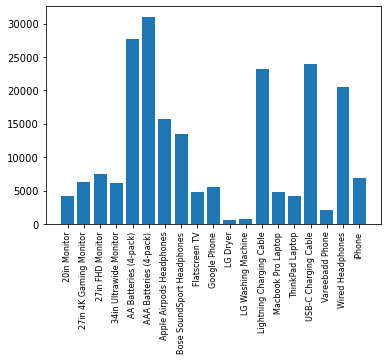

In [162]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [x for x, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

C:\Users\MOHIT~1.KUM\AppData\Local\Temp/ipykernel_11976/136096346.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\MOHIT~1.KUM\AppData\Local\Temp/ipykernel_11976/136096346.py:16: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


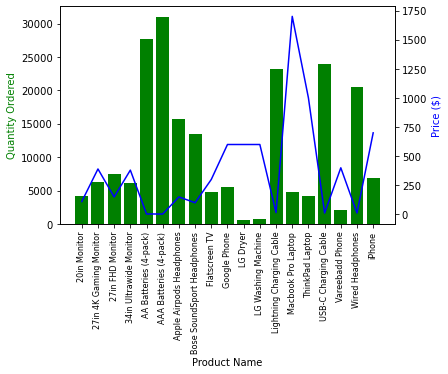

In [163]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

##### AA Batteries and AAA batteries sold the most, may be they are cheap that's why